In [35]:
from forg.train import train, EmbeddingMetricType

import matplotlib.pyplot as plt
import numpy as np
import pickle

In [18]:
result = train(
    "../data/repos/react",
    samples=2000,
    epochs=100_000,
    expansion_batch_size=32,
    D=2,
    metric=EmbeddingMetricType.HYPERBOLIC,
)

# of files: 2000





mbedding batches: 0it [00:00, ?it/s]

Computing tree distance matrix...
Computing tree distance matrix...


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [20:11<00:00, 82.52it/s]

Best epoch: 23474


In [19]:
with open('train-react-result.pickle', 'wb') as f:
    pickle.dump(result, f)

In [20]:
with open('train-react-result.pickle', 'rb') as f:
    result_loaded = pickle.load(f)

In [38]:
def extensions_to_colors(files):
    labels = {
        'js': 'red',
        'ts': 'green',
        'rs': 'blue',
        'html': 'purple',
        'css': 'orange',
        'cpp': 'yellow',
        'other': 'black',
    }
    colors = []
    for file in files:
        filename = file.path.split('/')[-1]
        extension = filename.split('.')[-1]
        colors.append(labels.get(extension, 'black'))

    return colors, labels

In [39]:
def folder_to_colors(files):
    labels = {
        '.github': 'red',
        'compiler': 'green',
        'fixtures': 'blue',
        'packages': 'purple',
        'scripts': 'orange',
        'other': 'black',
    }
    colors = []
    for file in files:
        filename = file.path
        index = filename.find('react')
        folder = filename[index:].split('/')[1]
        colors.append(labels.get(folder, 'black'))
    return colors, labels

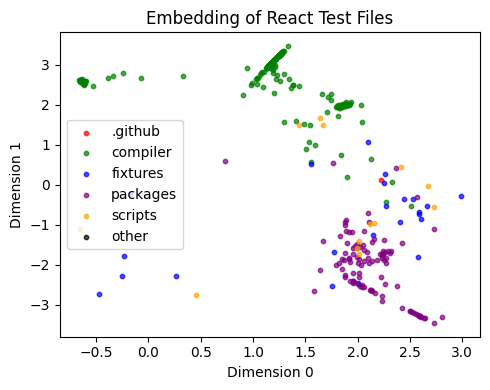

In [60]:
mode = 'Test'

if mode == 'Train':
    files = result_loaded.train_files
else:
    files = result_loaded.test_files

# colors, labels = extensions_to_colors(files)
colors, labels = folder_to_colors(files)

embeddings = result_loaded.embedding(files).cpu().detach()
plt.figure(figsize=(5,4))
for folder, color in labels.items():
    # Filter embeddings for the current folder
    mask = [c == color for c in colors]
    folder_embeddings = embeddings[mask]
    
    # Plot embeddings for this folder with its specific color
    plt.scatter(folder_embeddings[:, 0], folder_embeddings[:, 1], 
                s=10, color=color, label=folder, alpha=0.7)

plt.title(f"Embedding of React {mode} Files")
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.legend()
plt.tight_layout()
plt.show()